In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import dlib
from skimage import io
from scipy.spatial import distance

In [ ]:
dlib.DLIB_USE_CUDA

True

In [ ]:
sp = dlib.shape_predictor('/content/drive/My Drive/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('/content/drive/My Drive/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

In [ ]:
dlib.__version__

'19.18.0'

In [ ]:
img     = io.imread('/content/drive/My Drive/1.jpg')
img_src = io.imread('/content/drive/My Drive/1.jpg')

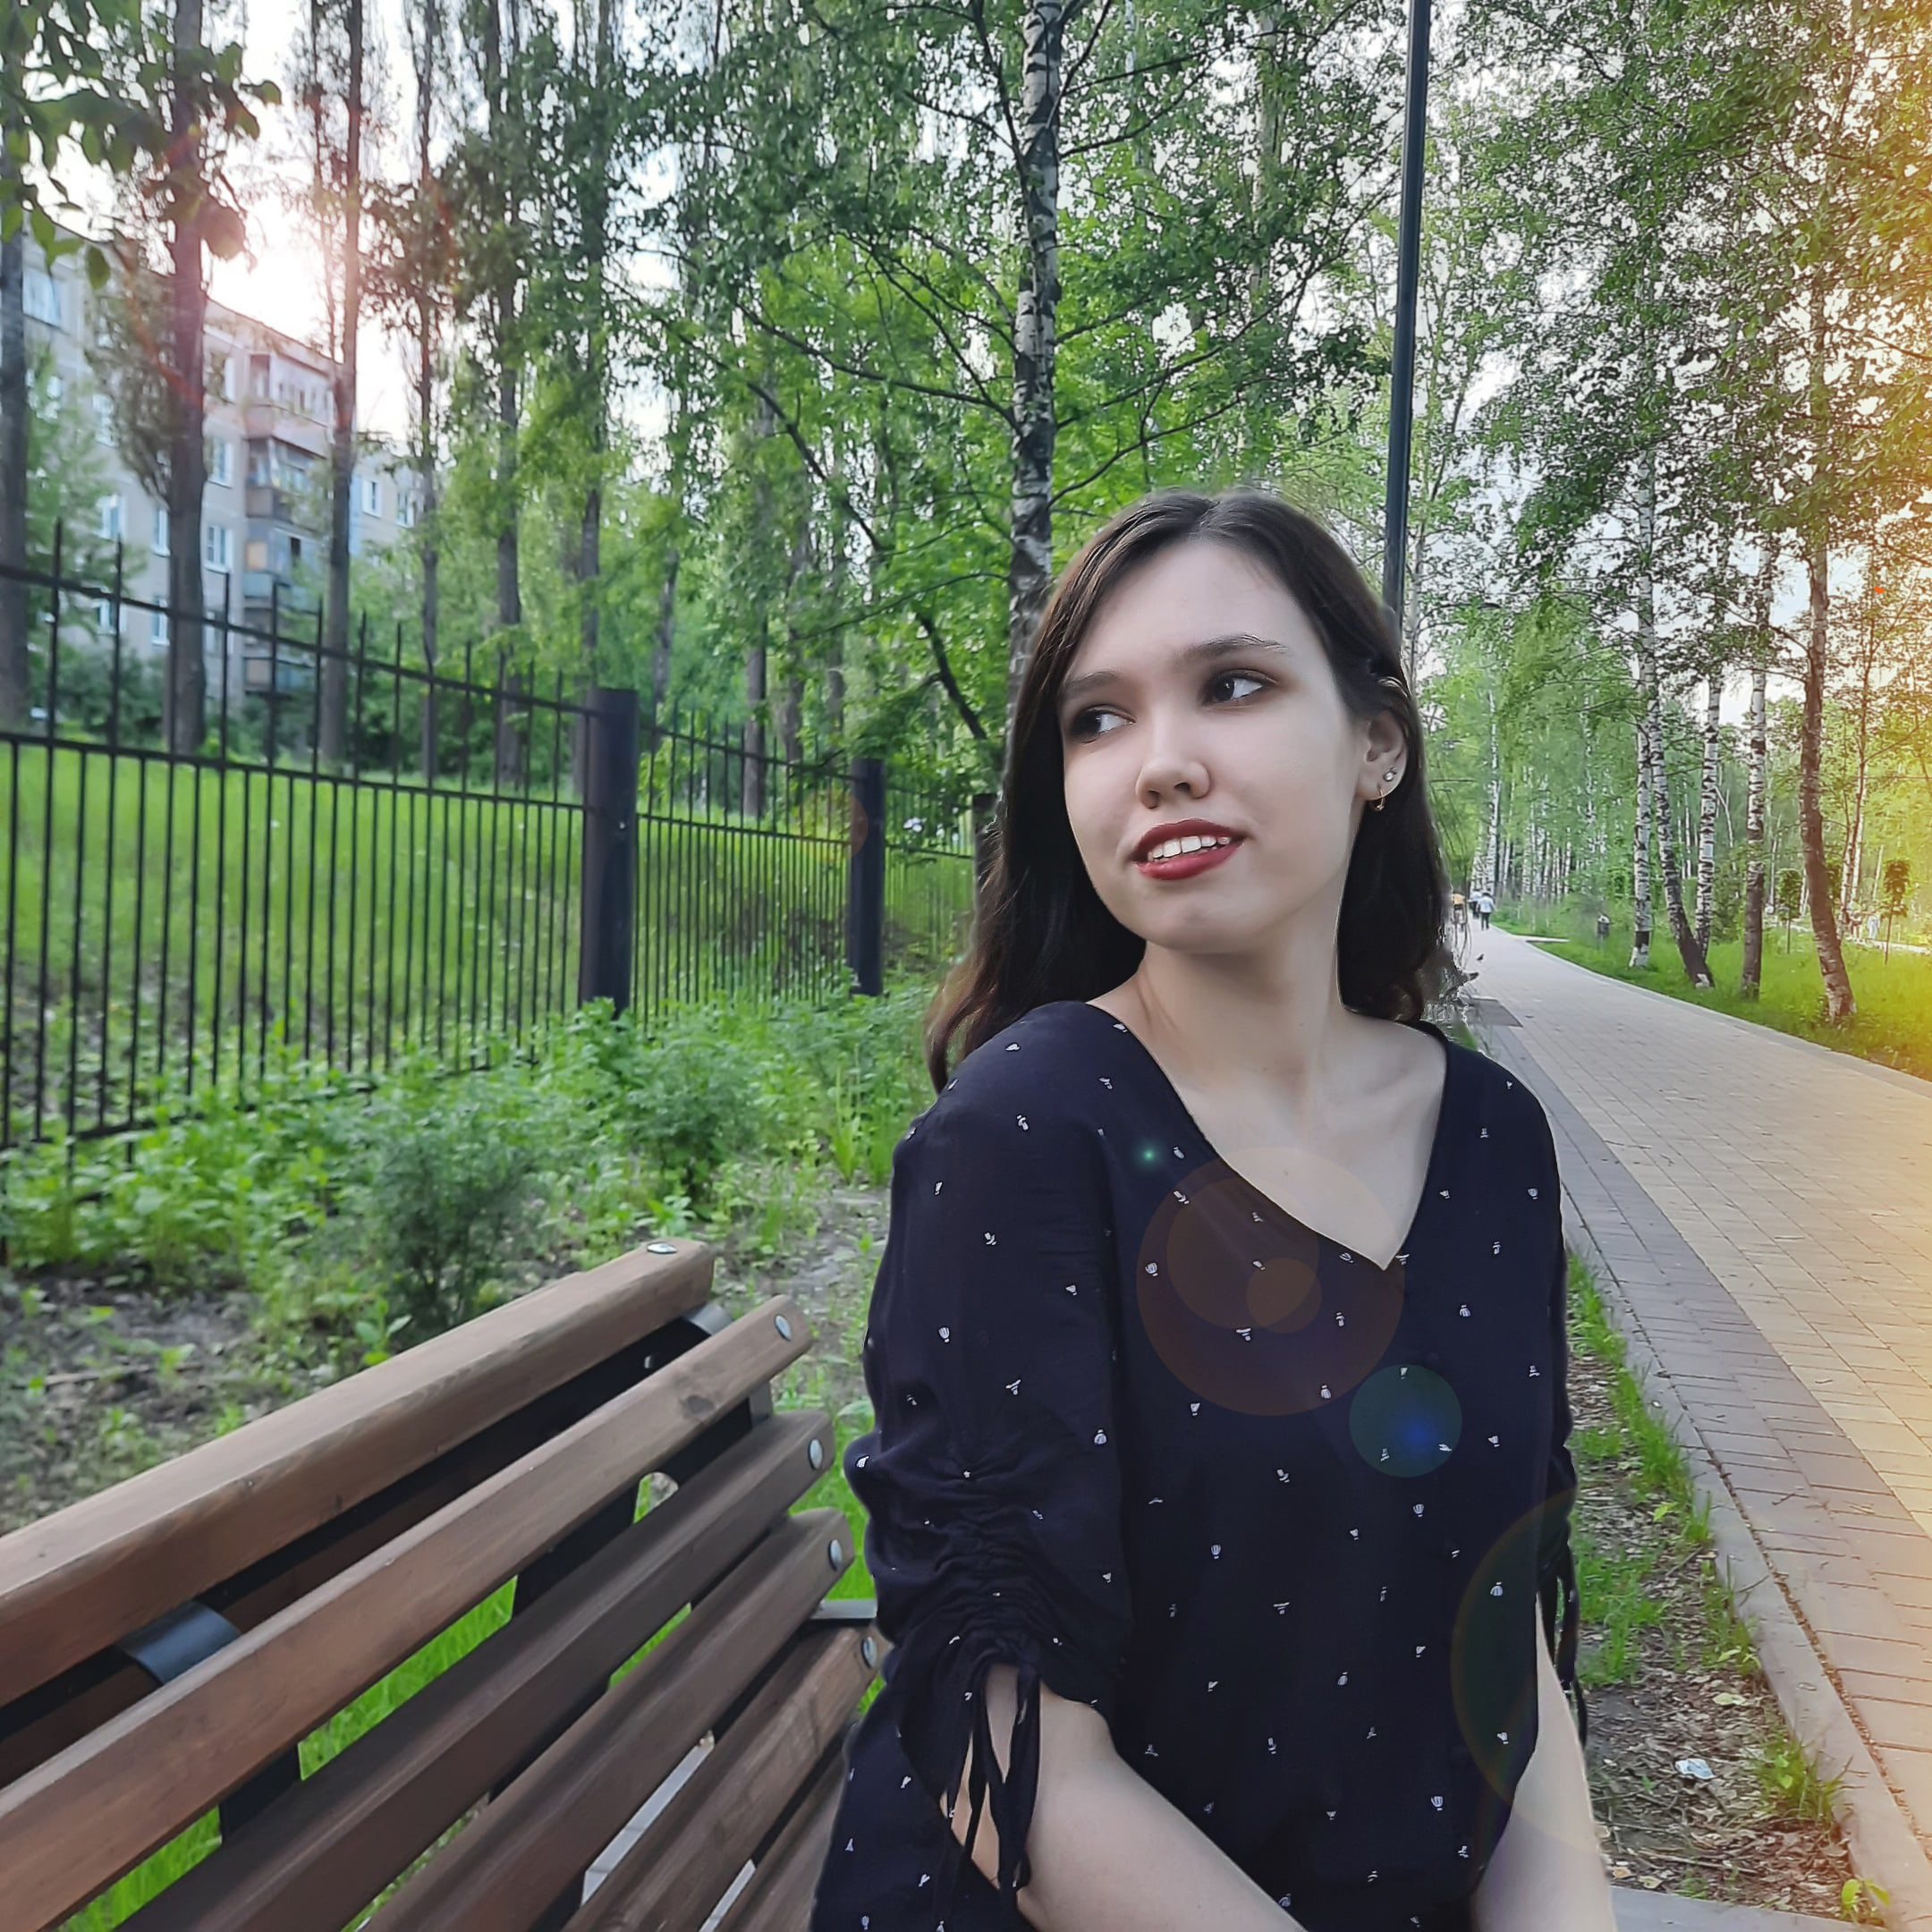

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/1.jpg')

In [ ]:
dets = detector(img_src, 1)

In [ ]:
dets[0].left()

1103

In [ ]:
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape = sp(img_src, d)    

Detection 0: Left: 1103 Top: 632 Right: 1488 Bottom: 1018
Detection 1: Left: 1975 Top: 626 Right: 2018 Bottom: 670


In [ ]:
shape

In [ ]:
import cv2

In [ ]:
import numpy as np
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.rectangle(img, (dets[0].left(), dets[0].top()), (dets[0].right(), dets[0].bottom()), (0, 255, 0, 255), 2)

shapex = shape_to_np(shape)

for (x, y) in shapex:
		cv2.circle(img, (x, y), 3, (0, 0, 255), -1)

cv2_imshow(img)

In [ ]:
face_descriptor1 = facerec.compute_face_descriptor(img_src, shape)

In [ ]:
face_descriptor1

dlib.vector([-0.0678805, 0.0623888, 0.10943, 0.0411822, -0.120995, -0.0467562, -0.00858046, -0.12306, 0.108296, -0.0927713, 0.123218, -0.0046656, -0.182511, -0.046483, -0.0692703, 0.0848202, -0.0672255, -0.112694, -0.0955122, -0.120741, -0.00862993, 0.110068, 0.0724115, -0.0260538, -0.115925, -0.273196, -0.0899312, -0.0333972, 0.101072, -0.063151, 0.0243056, 0.0592948, -0.194063, -0.0502614, 0.0255787, 0.0627886, -0.0471107, -0.0508391, 0.24479, 0.0209916, -0.158552, 0.0637283, 0.0341509, 0.262445, 0.220122, -0.0461353, -0.0214894, -0.0241633, 0.0885152, -0.220233, 0.0256623, 0.208021, 0.161897, 0.0529785, 0.022083, -0.0586059, -0.00363687, 0.138407, -0.147269, 0.112817, 0.0723467, -0.138156, 0.0176833, 0.00104067, 0.102582, 0.0395063, -0.0575157, -0.162839, 0.120923, -0.224444, -0.0343483, 0.0554364, -0.0999438, -0.120411, -0.243193, 0.0343473, 0.361513, 0.166969, -0.168446, 0.0275441, -0.125631, -0.0105457, -0.00728486, 0.0361651, -0.0633764, -0.0836519, -0.102119, 0.00493857, 0.2059

In [ ]:
img_2     = io.imread('/content/drive/My Drive/2.jpg')
img_src_2 = io.imread('/content/drive/My Drive/2.jpg')

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/2.jpg')

In [ ]:
dets_2 = detector(img_src_2, 1)

In [ ]:
for k, d in enumerate(dets_2):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape_2 = sp(img_src_2, d)  

Detection 0: Left: 1207 Top: 1009 Right: 1430 Bottom: 1232


In [ ]:
cv2.rectangle(img_2, (dets_2[0].left(), dets_2[0].top()), (dets_2[0].right(), dets_2[0].bottom()), (0, 255, 0, 255), 2)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_RGB2BGR)
cv2_imshow(img_2)

In [ ]:
face_descriptor2 = facerec.compute_face_descriptor(img_src_2, shape_2)

In [ ]:
a = distance.euclidean(face_descriptor1, face_descriptor2)
print(a)

0.9150041383884441


In [ ]:
img_b     = io.imread('/content/drive/My Drive/3.jpg')
img_src_b = io.imread('/content/drive/My Drive/3.jpg')

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/3.jpg')

In [ ]:
dets_b = detector(img_src_b, 1)

In [ ]:
for k, d in enumerate(dets_b):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape_b = sp(img_src_b, d)  

Detection 0: Left: 946 Top: 650 Right: 1611 Bottom: 1316


In [ ]:
cv2.rectangle(img_b, (dets_b[0].left(), dets_b[0].top()), (dets_b[0].right(), dets_b[0].bottom()), (0, 255, 0, 255), 2)
img_b = cv2.cvtColor(img_b, cv2.COLOR_RGB2BGR)
cv2_imshow(img_b)

In [ ]:
face_descriptorb = facerec.compute_face_descriptor(img_src_b, shape_b)

In [ ]:
a = distance.euclidean(face_descriptor1, face_descriptorb)
print(a)

0.8211498975965568


In [ ]:
a = distance.euclidean(face_descriptor2, face_descriptorb)
print(a)

0.8155916197033286
